----

# 앙상블 분석 : 부스팅

- 참고 : http://r-bong.blogspot.com/2016/10/adabag.html

----

## 1. Load Library

필요한 라이브러리를 불러온다. 설치가 안되어 있을 경우 패키지를 설치한다.

In [54]:
library(adabag)
data(iris)

## 2. Boosting Model

앙상플 모델링을 진행한다.

In [55]:
iris.boost <- boosting(Species~., data=iris, boos=T, mfinal=10)

In [56]:
iris.boost$class

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
  [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [16] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [21] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [26] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [31] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [36] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [41] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [46] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [51] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [56] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [61] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [66] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [71] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [76] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [81] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [86] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [91] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
 [96] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[101] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[106] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[111] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[116] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[121] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[126] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[131] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[136] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[141] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[146] "virginica"  "virginica"  "virginica"  "virginica"  "virginica"

In [57]:
head(iris.boost$prob)

1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0


In [58]:
# vote 몇 개의 트리가 해당 class를 할당했는지 보여준다.
head(iris.boost$votes)

12.61102,0,0
12.61102,0,0
12.61102,0,0
12.61102,0,0
12.61102,0,0
12.61102,0,0


## 3. Validation

변수의 중요도를 확인해본다.

In [59]:
iris.boost$importance

Petal.Length  Petal.Width Sepal.Length  Sepal.Width 
   65.485077    21.686775     5.536469     7.291679

## 4. Visualization

해당 결과를 시각화 해본다.

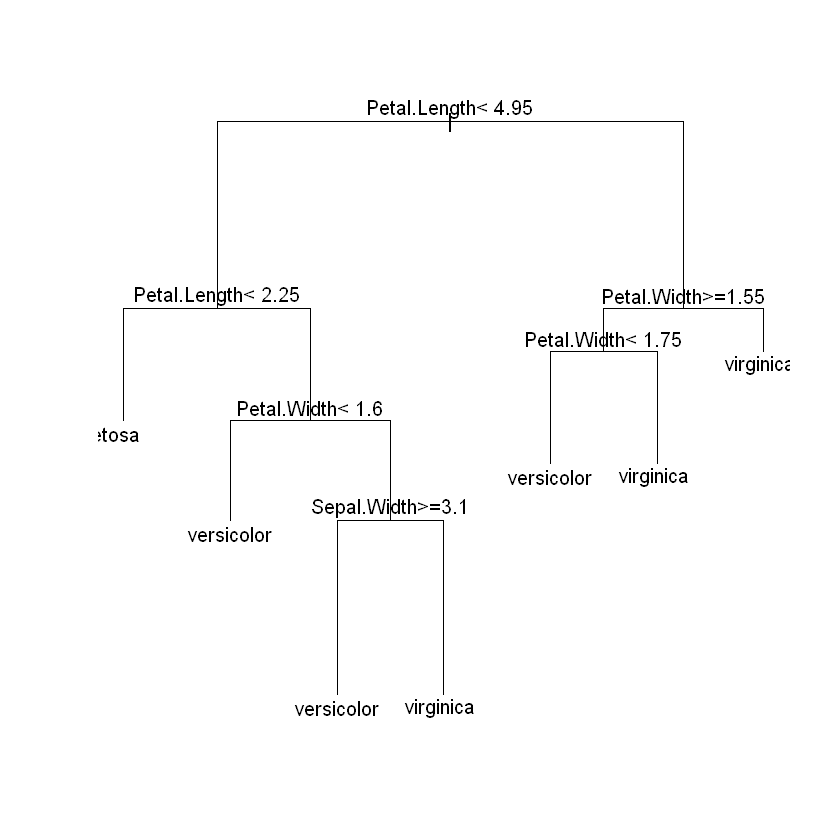

In [60]:
plot(iris.boost$trees[[10]])
text(iris.boost$trees[[10]])

## 5. Predict

만들어진 모형으로 예측을 해본다.

In [61]:
pred <- predict(iris.boost, newdata=iris)
tb <- table(pred$class, iris[,5])
tb

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         0
  virginica       0          0        50

오차값이나 결측값 없이 완벽하게 분류되었다. 

In [62]:
error <- 1 - sum(diag(tb))/sum(tb)
error

[1] 0

## 7. Load Library

필요한 라이브러리를 불러온다. 설치가 안되어 있을 경우 패키지를 설치한다. 2개의 class를 모델링 하기 위해 foctor를 숫자로 변환할 때 아래와 같은 방식을 취한다.

In [65]:
install.packages("ada")
library(ada)

Installing package into 'C:/Users/jang/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'ada' is in use and will not be installed"

## 8. Data Preprocess

2개의 class를 모델링 하기 위해 foctor를 숫자로 변환할 때 아래와 같은 방식을 취한다.

In [66]:
newiris <- iris[iris$Species != 'setosa', ]
newiris[,5] <- factor(as.numeric(newiris[,5]) -1)

In [67]:
str(newiris)
head(newiris)

'data.frame':	100 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
51,7.0,3.2,4.7,1.4,1
52,6.4,3.2,4.5,1.5,1
53,6.9,3.1,4.9,1.5,1
54,5.5,2.3,4.0,1.3,1
55,6.5,2.8,4.6,1.5,1
56,5.7,2.8,4.5,1.3,1


In [68]:
newiris[,5]

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
Levels: 1 2

총 100개의 자료를 60개의 훈련용 자료와 40개의 검증용 자료로 나눈다.

In [69]:
n <- dim(newiris)[1]
trind <- sample(1:n, floor(.6*n), F)  # 훈련용 60%의 데이터
teind <- setdiff(1:n, trind)    # set Difference 차집합
iris[,5] <- as.factor((levels(iris[,5])[2:3]))  # 0,1,2가 차례대로 50개

## 8. Build Model

훈련용 데이터를 이용하여 부스팅 방법으로 모형을 구축, 검증용 데이터에 대해 분류를 실시한다.
- nu=1은 부스팅을 위한 축소 모수
- type="discrete"는 부스팅 알고리즘 지정

In [70]:
gdis <- ada(Species~., data=iris[trind,], iter=20, nu=1, type="discrete")
gdis

Call:
ada(Species ~ ., data = iris[trind, ], iter = 20, nu = 1, type = "discrete")

Loss: exponential Method: discrete   Iteration: 20 

Final Confusion Matrix for Data:
            Final Prediction
True value   versicolor virginica
  versicolor         22         6
  virginica           9        23

Train Error: 0.25 

Out-Of-Bag Error:  0.317  iteration= 19 

Additional Estimates of number of iterations:

train.err1 train.kap1 
        13         13 


In [71]:
gdis <- addtest(gdis, iris[teind, -5], iris[teind,5])
gdis

Call:
ada(Species ~ ., data = iris[trind, ], iter = 20, nu = 1, type = "discrete")

Loss: exponential Method: discrete   Iteration: 20 

Final Confusion Matrix for Data:
            Final Prediction
True value   versicolor virginica
  versicolor         22         6
  virginica           9        23

Train Error: 0.25 

Out-Of-Bag Error:  0.317  iteration= 19 

Additional Estimates of number of iterations:

train.err1 train.kap1 test.errs2 test.kaps2 
        13         13          3          3 


## 8. Check Result : plot(), varplot(), pairs()

**plot(), varplot(), pairs() 함수**를 이용하여 부스팅 결과를 시각화해본다. train과 test에 대해 kappa 값을 추력해서 모델이 어느 정도 좋은 모델인지 확인해본다. 대부분 train보다 test가 성과가 낮게 나온다.
- 해당 결과는 분식마다 달라짐

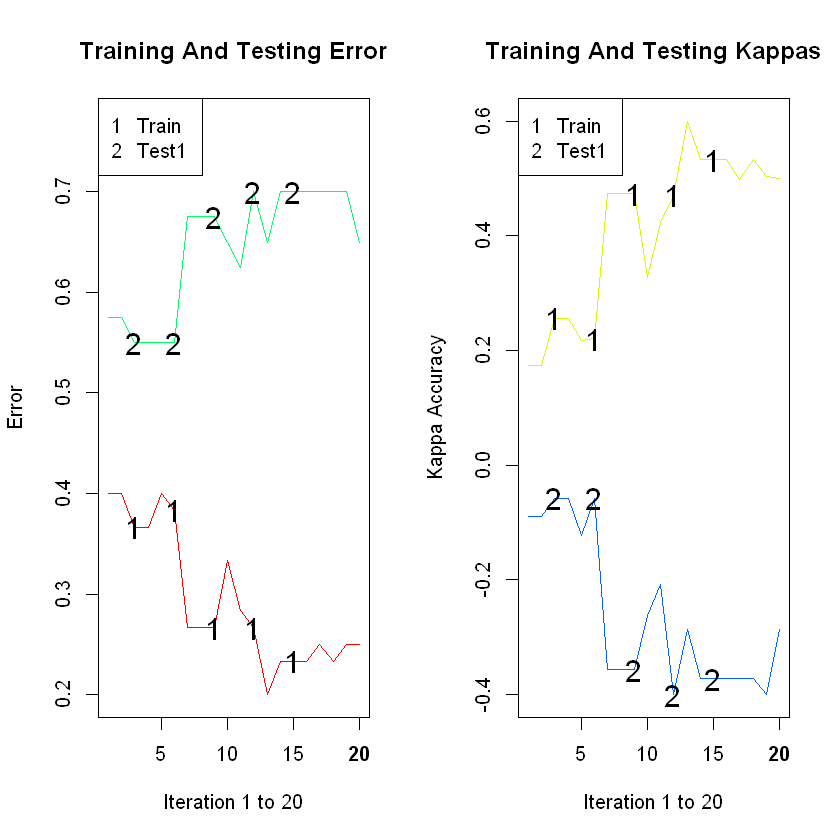

In [72]:
plot(gdis, kappa=T, test=T)

varplot() 함수는 변수의 중요도를 보여준다. Petal.Length 변수가 분류에서 사장 중요한 변수로 사용됨을 확인 할 수 있다.

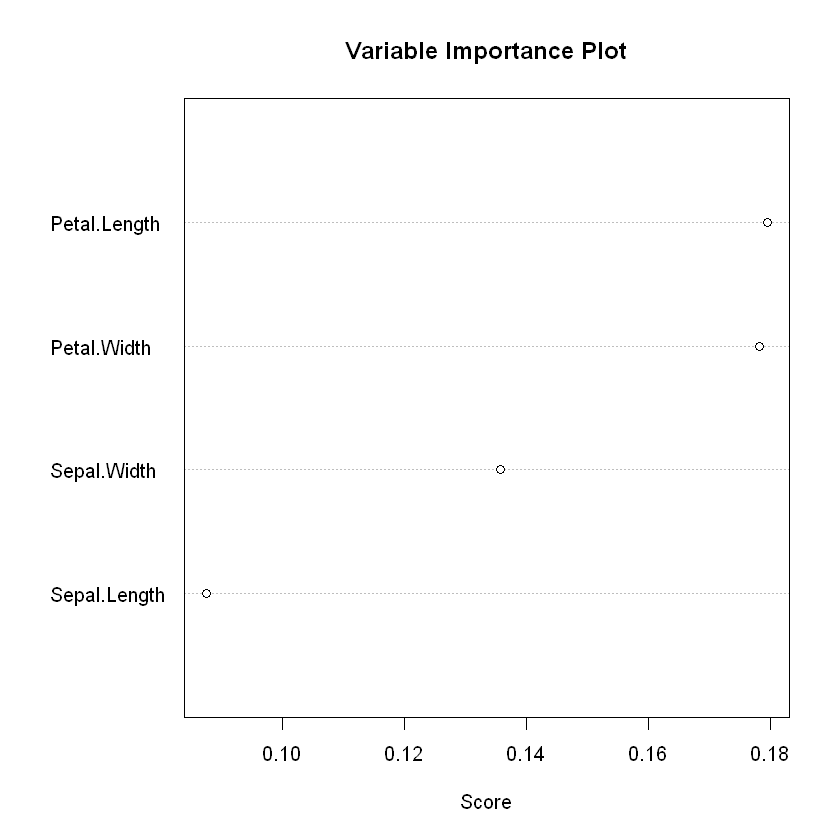

In [76]:
varplot(gdis)

pairs()함수는 두 예측 변수의 조합별로 분류된 결과를 그려준다. maxver= 옵션을 통해 변수의 수를 지정할 수 있다.

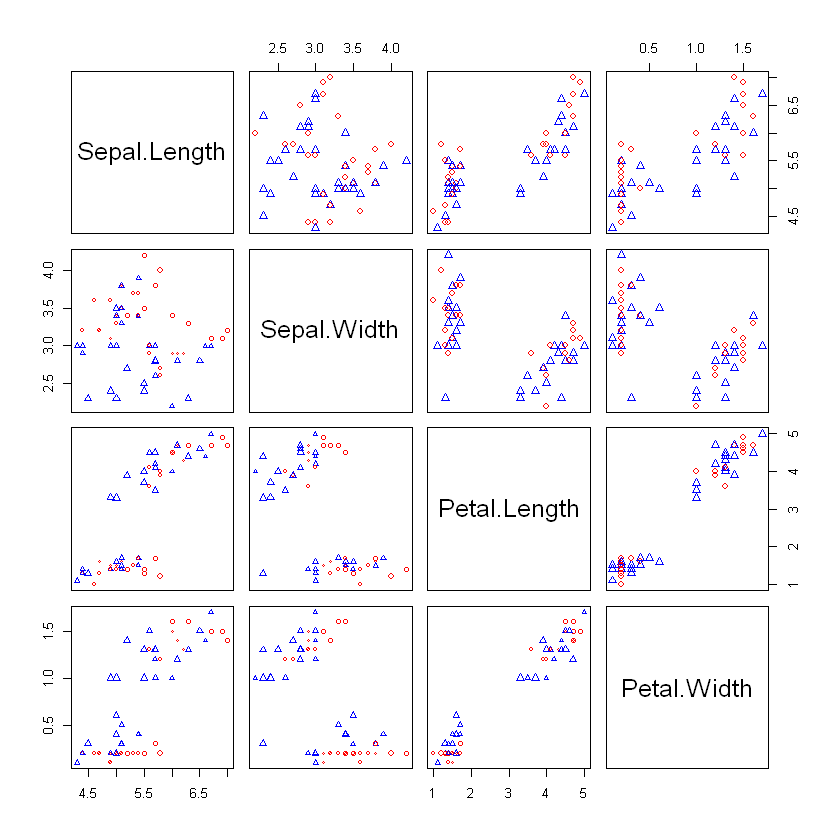

In [77]:
pairs(gdis, iris[trind, -5], maxvar=4)

----